In [1]:
import os
import keras
import seaborn as sns
import tensorflow as tf
from keras import layers, applications, models
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [2]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
input_size = 256
image_dimensions = (input_size, input_size)

# Normalize image color values
datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

# Build training generator dataset
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size = image_dimensions,
    batch_size = 32,
    class_mode ='categorical',
    color_mode = 'rgb',
    shuffle=True
)

# Normalize image color values
test_datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

# Build testing generator dataset
test_generator = test_datagen.flow_from_directory(
    '../data/test',
    target_size = image_dimensions,
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = False
)

Found 4529 images belonging to 5 classes.
Found 1127 images belonging to 5 classes.


In [8]:
# Load trained model
base_model = applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(256, 256, 3)
)

In [9]:
# Freeze layers
base_model.trainable = False

In [10]:
########### CODE PROVIDED BY PROFESSOR ###########
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")  # 5 classes output
])

In [11]:
########### CODE PROVIDED BY PROFESSOR ###########
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,765 (72.14 MB)

 Trainable params: 4,195,077 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
	optimizer="adam",
    loss="categorical_crossentropy",
	metrics=["accuracy"]
)

In [13]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [14]:
history = model.fit(
    train_generator,
    epochs = 30,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

/Users/langtowl/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


2025-02-11 19:57:45.680592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


142/142 - 52s - 370ms/step - accuracy: 0.4120 - loss: 20.3834 - val_accuracy: 0.6291 - val_loss: 10.2322
Epoch 2/30


142/142 - 56s - 397ms/step - accuracy: 0.4674 - loss: 16.7627 - val_accuracy: 0.6362 - val_loss: 7.2834
Epoch 3/30


142/142 - 56s - 392ms/step - accuracy: 0.4703 - loss: 13.2003 - val_accuracy: 0.6398 - val_loss: 5.5895
Epoch 4/30


142/142 - 53s - 375ms/step - accuracy: 0.4851 - loss: 9.7436 - val_accuracy: 0.6344 - val_loss: 3.6320
Epoch 5/30


142/142 - 53s - 377ms/step - accuracy: 0.4884 - loss: 6.1559 - val_accuracy: 0.6398 - val_loss: 3.1751
Epoch 6/30


142/142 - 48s - 341ms/step - accuracy: 0.4999 - loss: 4.0378 - val_accuracy: 0.6291 - val_loss: 1.8851
Epoch 7/30


142/142 - 48s - 340ms/step - accuracy: 0.5120 - loss: 2.5245 - val_accuracy: 0.5776 - val_loss: 1.3617
Epoch 8/30


142/142 - 48s - 340ms/step - accuracy: 0.5279 - loss: 1.8141 - val_accuracy: 0.6486 - val_loss: 1.1954
Epoch 9/30


142/142 - 48s - 341ms/step - accuracy: 0.5445 - loss: 1.5413 - val_accuracy: 0.6566 - val_loss: 1.0890
Epoch 10/30
142/142 - 48s - 338ms/step - accuracy: 0.5142 - loss: 1.7723 - val_accuracy: 0.6415 - val_loss: 1.3341
Epoch 11/30


142/142 - 48s - 340ms/step - accuracy: 0.5527 - loss: 1.4093 - val_accuracy: 0.6327 - val_loss: 1.0242
Epoch 12/30


142/142 - 49s - 342ms/step - accuracy: 0.5332 - loss: 1.5896 - val_accuracy: 0.6673 - val_loss: 0.9906
Epoch 13/30


142/142 - 48s - 341ms/step - accuracy: 0.5533 - loss: 1.3364 - val_accuracy: 0.6362 - val_loss: 0.9858
Epoch 14/30


142/142 - 48s - 340ms/step - accuracy: 0.5664 - loss: 1.2492 - val_accuracy: 0.6557 - val_loss: 0.9089
Epoch 15/30
142/142 - 48s - 341ms/step - accuracy: 0.5469 - loss: 1.3170 - val_accuracy: 0.6673 - val_loss: 0.9613
Epoch 16/30


142/142 - 49s - 343ms/step - accuracy: 0.5560 - loss: 1.2955 - val_accuracy: 0.6806 - val_loss: 0.8498
Epoch 17/30
142/142 - 49s - 344ms/step - accuracy: 0.5606 - loss: 1.3206 - val_accuracy: 0.6806 - val_loss: 0.8857
Epoch 18/30
142/142 - 48s - 341ms/step - accuracy: 0.5555 - loss: 1.3044 - val_accuracy: 0.6726 - val_loss: 1.1051
Epoch 19/30
142/142 - 48s - 337ms/step - accuracy: 0.5498 - loss: 1.3579 - val_accuracy: 0.6690 - val_loss: 1.1131
Epoch 20/30
142/142 - 48s - 339ms/step - accuracy: 0.5566 - loss: 1.3419 - val_accuracy: 0.5173 - val_loss: 1.0235
Epoch 21/30
142/142 - 48s - 340ms/step - accuracy: 0.5544 - loss: 1.2962 - val_accuracy: 0.5723 - val_loss: 1.0130


In [15]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

36/36 - 9s - 257ms/step - accuracy: 0.6806 - loss: 0.8498
Test loss: 0.8498208522796631
Test accuracy: 0.6805678606033325


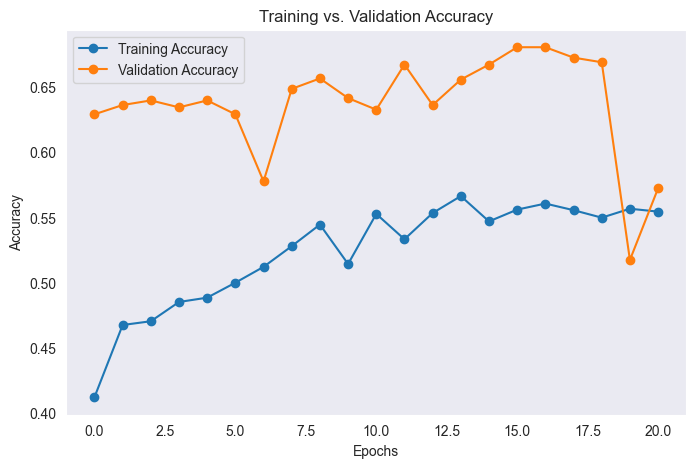

In [16]:
# Plot training vs validation accuracy
plt.figure(figsize = (8, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid()
plt.show()